# Разработка моделей мошинного обучения которая поможет управлять рисками и принимать объективное решение о покупке. 

**Описание проекта:**  

Владелец молочного хозяйства «Вольный луг» заключил контракт с ассоциацией пастбищ «ЭкоФерма».Условия позволяют фермеру очень тщательно отобрать коров. Молока отбирается по строгой методике, и при этомфермеру нужно выполнять свой план развития молочного хозяйства. Нужно, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по критериям фермера, ничуть не хуже.


**Цель:**

Создать две прогнозные модели для отбора бурёнок в поголовье.

**Ход исследования:**
* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
* Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
* Исследовательский анализ данных: изучение основных параметров объектов, их распределения, зависимости стоимости от различных характеристик, а также выявление и обработка аномалий.
* Корреляционный анализ: Изучение взаимосвязь между признаками с помощью расчета матрицы корреляции и построения диаграмм рассеяния
* Задача регрессии: обучить три модели линейной регрессии (прогнозирование удоя).
* Задача классификации: обучение модели логистической регрессии с целевым признаком "Вкус молока"

**Общий вывод:** 

Спрогнозированные значения удоя и вкуса молока для коров на покупку были добавлены в итоговый датафрейм. Для фермера был отобран список коров, у которых прогнозируется удой более 6000 кг/год и вкусное молоко.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

## 1) Загрузка данных

In [4]:
main = pd.read_csv ('ferma_main.csv', sep = ";") 
dad = pd.read_csv ('ferma_dad.csv', sep = ";") 
cow = pd.read_csv ('cow_buy.csv', sep = ";") 


In [3]:
display(main.sample(n=10))
display(dad.sample(n=10))
display(cow.sample(n=10))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
62,63,6564,"16,3",1991,"0,93",Вис Бик Айдиал,Холмистое,Айдиалл,"3,71","3,075",не вкусно,более_2_лет
206,207,5913,"13,2",1972,"0,88",Вис Бик Айдиал,Холмистое,Соверин,"3,62","3,077",не вкусно,более_2_лет
548,549,6688,"14,8",1727,"0,93",Вис Бик Айдиал,Холмистое,Айдиал,"3,72","3,074",не вкусно,более_2_лет
152,153,5778,"13,3",2216,"0,89",Вис Бик Айдиал,Равнинное,Соверин,"3,59","3,079",вкусно,более_2_лет
201,202,6473,"16,5",2033,"0,95",Вис Бик Айдиал,Холмистое,Соверин,"3,73","3,078",вкусно,более_2_лет
464,465,6788,"15,7",1893,"0,93",РефлешнСоверинг,Равнинное,Айдиал,"3,7","3,071",не вкусно,более_2_лет
497,498,6584,"16,4",2346,"0,95",РефлешнСоверинг,Равнинное,Соверин,"3,73","3,078",не вкусно,более_2_лет
233,234,6016,"15,7",2003,"0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,71","3,076",вкусно,более_2_лет
251,252,5846,"14,3",1756,"0,88",РефлешнСоверинг,Равнинное,Соверин,"3,63","3,072",не вкусно,более_2_лет
41,42,6581,"15,5",1797,"0,93",Вис Бик Айдиал,Холмистое,Айдиалл,"3,71","3,075",вкусно,более_2_лет


,id,Имя Папы
364,365,Буйный
337,338,Буйный
299,300,Буйный
312,313,Соловчик
55,56,Барин
616,617,Буйный
317,318,Барин
177,178,Геркулес
621,622,Буйный
500,501,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,065",более_2_лет
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,77","3,053",менее_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,34","3,069",более_2_лет
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,68","3,046",более_2_лет
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,73","3,073",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет


Переименование столбцов:

In [4]:
main = main.rename(columns = ({'Удой, кг': 'milk_yield_kg','ЭКЕ (Энергетическая кормовая единица)':'EKE', 'СПО (Сахаро-протеиновое соотношение)': 'SPO',
                               'Сырой протеин, г': 'crude_protein_g', 'Порода': 'breed','Тип пастбища': 'pasture',
                               'порода папы_быка': 'dad_breed', 'Жирность,%' : 'fat_%', 'Белок,%': 'protein_%', 
                               'Вкус молока': 'milk_taste', 'Возраст': 'age'}))

dad = dad.rename(columns = ({'Имя Папы':'dad'}))
cow = cow.rename(columns =({'Порода': 'breed', 'Тип пастбища':'pasture', 'порода папы_быка': 'dad_breed', 'Имя_папы': 'dad', 
                            'Текущая_жирность,%': 'current_fat_%',
                            'Текущий_уровень_белок,%': 'current_protein_%', 'Возраст': 'age'} ))

## 2) Предобработка данных

In [5]:
print(main.info())
print()
print(dad.info())
print()
print(cow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               634 non-null    int64 
 1   milk_yield_kg    634 non-null    int64 
 2   EKE              634 non-null    object
 3   crude_protein_g  634 non-null    int64 
 4   SPO              634 non-null    object
 5   breed            634 non-null    object
 6   pasture          634 non-null    object
 7   dad_breed        634 non-null    object
 8   fat_%            634 non-null    object
 9   protein_%        634 non-null    object
 10  milk_taste       634 non-null    object
 11  age              634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      629 non-null    int


* Количество значений в столбцах одинаково. Значит, в данных нет ропущенных значений. 

* Изменение типа данных в столбцах `fat_%`, `protein_%`, `EKE`, `SPO`, `current_fat_%`, `current_protein_%` в float, так как это вещественные числа, могут содержать десятичные значения. `age`, `breed`,  `dad_breed`, `milk_taste`, `pasture`, `dad` преобразование в категориальный тип, так как содержат ограниченное количество уникальных значений, что позволит сэкономить память и упростить анализ. 


In [6]:
for df in [main, cow, dad]:
    for i in ['age', 'breed','dad_breed', 'milk_taste', 'pasture', 'dad']:
        if i in df.columns:
            df[i] = df[i].astype('category')
            
for df in [main, cow]:
    for i in ['fat_%', 'protein_%', 'EKE', 'SPO','current_fat_%', 'current_protein_%']:
        if i in df.columns:
            df[i] = df[i].str.replace(',', '.').astype(float)


**Проверка и удаление явных дубликатов**

In [7]:
print(main.duplicated().sum())
print(dad.duplicated().sum())
print(cow.duplicated().sum())

5
0
4


In [9]:
main = main.drop_duplicates()
cow = cow.drop_duplicates()
print(main.duplicated().sum())
print(cow.duplicated().sum())


0
0


**Проверка и удаление неявных дубликатов**

In [10]:

for idx, df in enumerate([main, cow, dad], start=1):
    for i in ['breed','pasture','dad_breed', 'dad']:
          if i in df.columns:
            print(f"Таблица {idx}: Столбец: {i}, Уникальные значения: {df[i].unique()}")


Таблица 1: Столбец: breed, Уникальные значения: ['Вис Бик Айдиал', 'РефлешнСоверинг']
Categories (2, object): ['Вис Бик Айдиал', 'РефлешнСоверинг']
Таблица 1: Столбец: pasture, Уникальные значения: ['Равнинное', 'Равнинные', 'Холмистое']
Categories (3, object): ['Равнинное', 'Равнинные', 'Холмистое']
Таблица 1: Столбец: dad_breed, Уникальные значения: ['Айдиал', 'Соверин', 'Айдиалл']
Categories (3, object): ['Айдиал', 'Соверин', 'Айдиалл']
Таблица 2: Столбец: breed, Уникальные значения: ['Вис Бик Айдиал', 'РефлешнСоверинг']
Categories (2, object): ['Вис Бик Айдиал', 'РефлешнСоверинг']
Таблица 2: Столбец: pasture, Уникальные значения: ['холмистое', 'равнинное']
Categories (2, object): ['холмистое', 'равнинное']
Таблица 2: Столбец: dad_breed, Уникальные значения: ['Айдиал', 'Соверин']
Categories (2, object): ['Айдиал', 'Соверин']
Таблица 2: Столбец: dad, Уникальные значения: ['Геркулес', 'Буйный', 'Барин', 'Соловчик']
Categories (4, object): ['Геркулес', 'Буйный', 'Барин', 'Соловчик']
Та

Проблема есть в таблице `main` в столбцах `dad_breed`, `pasture`. Исправление написания Айдиалл на Айдиал и Равнинные на равнинное 

In [11]:
main['pasture'] = main['pasture'].str.lower()
main['pasture'] = main['pasture'].replace("равнинные", "равнинное")
main['dad_breed'] = main['dad_breed'].replace("Айдиалл", "Айдиал")


## 3) Исследовательский анализ данных

In [12]:
num = ['fat_%', 'protein_%', 'milk_yield_kg','EKE', 'crude_protein_g', 'SPO',  'current_fat_%', 'current_protein_%']
cat = ['age', 'milk_taste', 'breed', 'pasture', 'dad_breed', 'dad'] 


Описание числовых признаков:


,fat_%,protein_%,milk_yield_kg,EKE,crude_protein_g,SPO
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,3.603657,3.075671,6188.750397,14.543879,1923.364070,0.913116
std,0.168656,0.002549,1644.795489,1.306408,182.956251,0.032203
min,2.990000,3.069000,5204.000000,10.900000,1660.000000,0.840000
25%,3.590000,3.074000,5751.000000,13.500000,1771.000000,0.890000
50%,3.650000,3.076000,6133.000000,14.700000,1888.000000,0.930000
75%,3.720000,3.077000,6501.000000,15.600000,2062.000000,0.940000
max,3.750000,3.085000,45616.000000,16.800000,2349.000000,0.960000


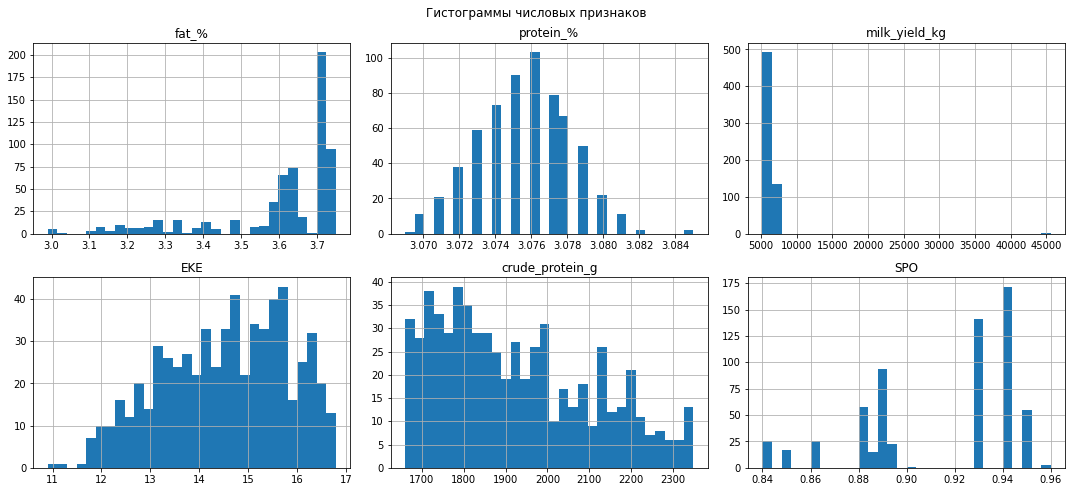

Описание числовых признаков:


,current_fat_%,current_protein_%
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


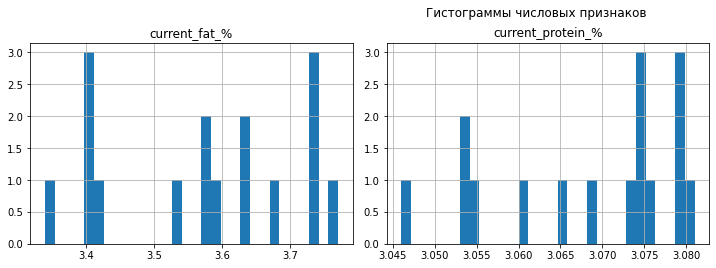

In [13]:
# Функция для анализа числовых признаков
def analyze_num(df, prisnak):
    num = [col for col in prisnak 
                  if col in df.columns]
    desc = df[num].describe()
    print("Описание числовых признаков:")
    display(desc)
     
    # Распределения
    df[num].hist(bins=30, figsize=(15, 10), layout=(3, 3))
    plt.suptitle("Гистограммы числовых признаков")
    plt.tight_layout()
    plt.show()
    
analyze_num(main, num)
analyze_num(cow, num)

**ВЫВОД**

* Сильные выбросы в `milk_yield_kg` максимальное значение: 45,616 кг при среднем 6,188 кг, 75% перцентиль: 6,501 кг, а максимум в 7 раз больше.

* Очень маленькое стандартное отклонение (0.0025) у `protein_%`. 

* У `fat_%` Минимум 2.99 немного ниже 25%-квартиля возможно, лёгкий выброс.

* У `SPO` не нормальное распределение - два пика ,пропуск значений в диапазоне 0.90-0.92

* В таблице cow очень мало наблюдений

<AxesSubplot:>

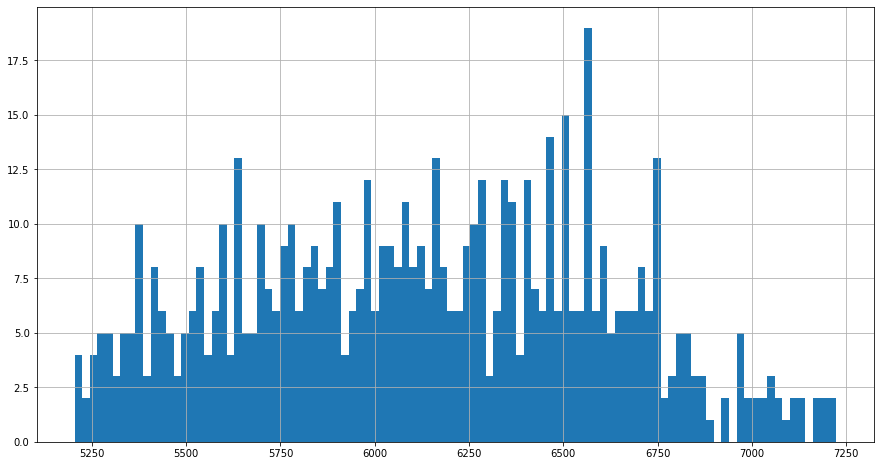

In [14]:
Q1 = main['milk_yield_kg'].quantile(0.25)
Q3 = main['milk_yield_kg'].quantile(0.75)
IQR = Q3 - Q1

main = main[(main['milk_yield_kg'] >= (Q1 - 3 * IQR)) & (main['milk_yield_kg'] <= (Q3 + 3 * IQR))]

main['milk_yield_kg'].hist(bins=100, figsize=(15,8))

                   age             milk_taste                    breed  \
           более_2_лет менее_2_лет     вкусно не вкусно Вис Бик Айдиал   
Количество      518.00      110.00     370.00    258.00         372.00   
Доля              0.82        0.18       0.59      0.41           0.59   

                             pasture           dad_breed          
           РефлешнСоверинг холмистое равнинное    Айдиал Соверин  
Количество          256.00    350.00    278.00     317.0   311.0  
Доля                  0.41      0.56      0.44       0.5     0.5  


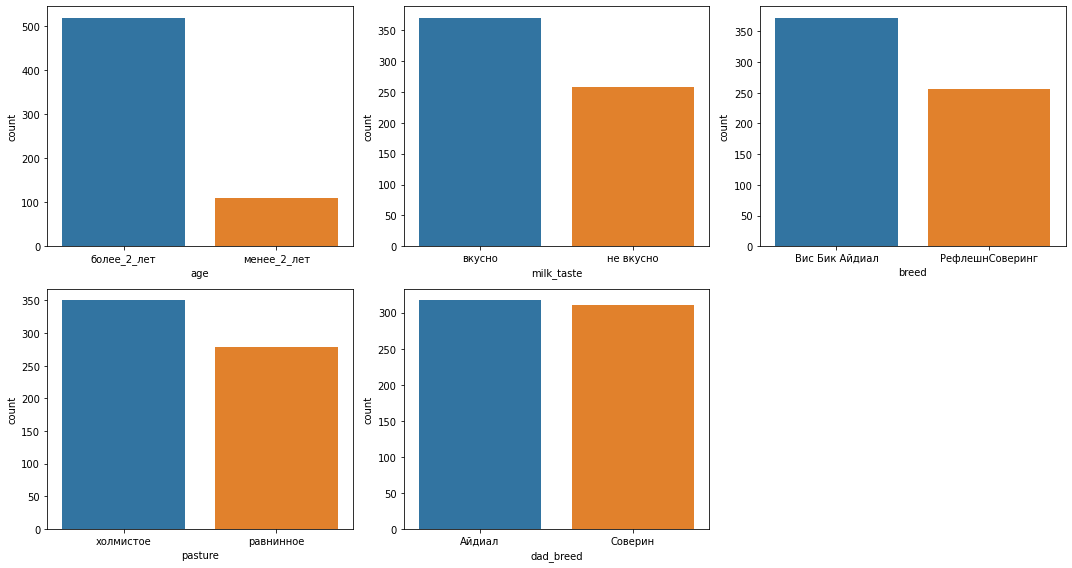

                   age                      breed                   pasture  \
           более_2_лет менее_2_лет Вис Бик Айдиал РефлешнСоверинг равнинное   
Количество       11.00        5.00            8.0             8.0       8.0   
Доля              0.69        0.31            0.5             0.5       0.5   

                     dad_breed           dad                          
           холмистое   Соверин Айдиал Буйный Геркулес Барин Соловчик  
Количество       8.0     10.00   6.00   7.00     5.00  2.00     2.00  
Доля             0.5      0.62   0.38   0.44     0.31  0.12     0.12  


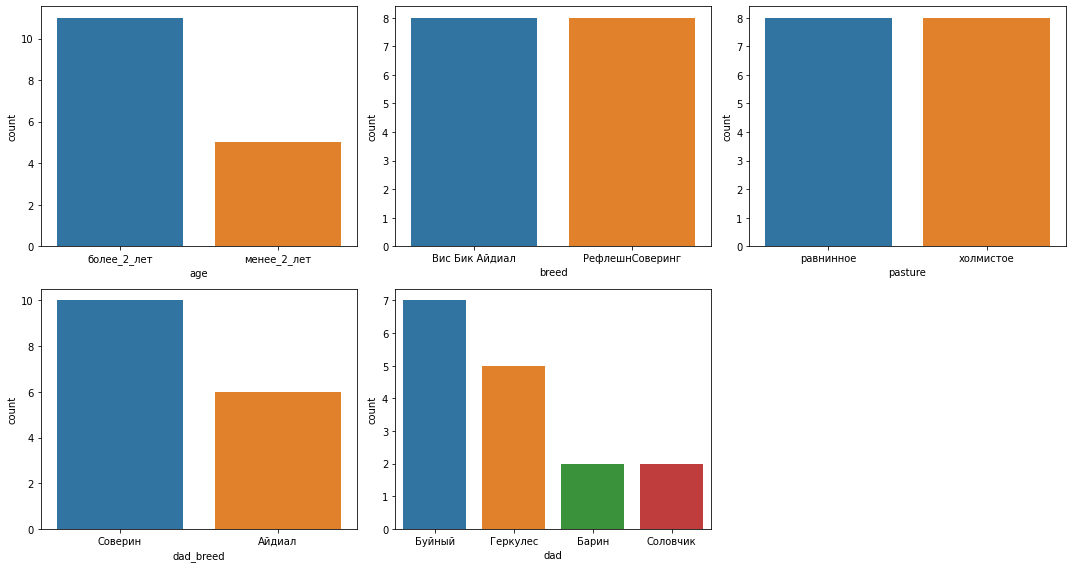

In [15]:
# Функция для анализа категориальных признаков
def analyze_cat(df, cat):
        data = {}
        cols = 3
        for col in cat:
            if col in df.columns:
                counts = df[col].value_counts()
                freqs = df[col].value_counts(normalize=True).round(2)
                temp = pd.DataFrame([counts.values, freqs.values], 
                                index=['Количество', 'Доля'], 
                                columns=counts.index)
                data[col] = temp
        df_all = pd.concat(data.values(), axis=1, keys=data.keys())
        print(df_all)
               
        cat = [c for c in cat if c in df.columns]
        plt.figure(figsize=(5 * cols, 4 * ((len(cat) + cols - 1) // cols)))
        for i, col in enumerate(cat, 1):
                plt.subplot(((len(cat) + cols - 1) // cols), cols, i)
                sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    
        plt.tight_layout()
        plt.show()
analyze_cat(main,cat)
analyze_cat(cow,cat)

**ВЫВОД**

* Сильный дисбаланс в возрасте коров 83% коров старше 2 лет, только 17% младше

* Сбалансированое распределение у  `milk_taste`, `breed`, `pasture`, `dad_breed`

* В «ЭкоФермы» больше коров, у которых порода отца "Соверин"

## 4) Корреляционный анализ

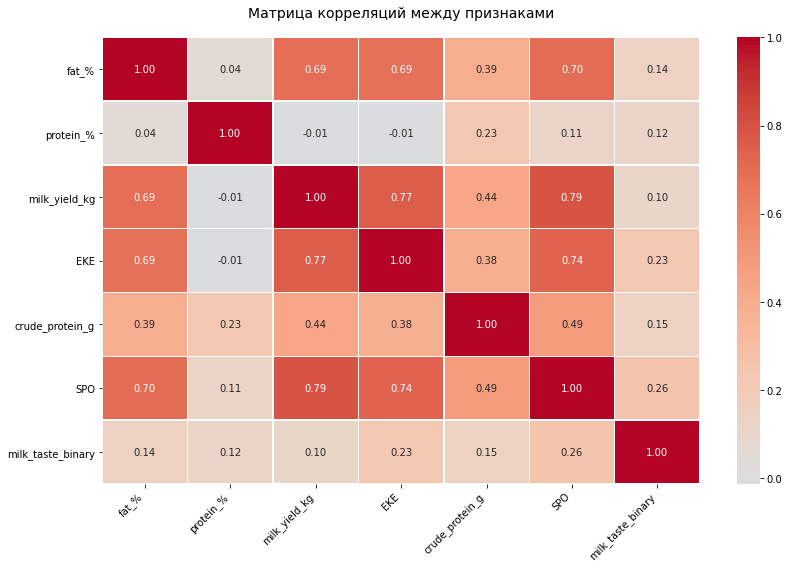

In [17]:
main['milk_taste_binary'] = main['milk_taste'].replace({'вкусно': 1, 'не вкусно': 0})
num_main = ['fat_%', 'protein_%', 'milk_yield_kg','EKE', 'crude_protein_g', 'SPO', 'milk_taste_binary']
corr_matrix = main[num_main].corr(method = "spearman")

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", 
            annot_kws={"size": 10}, linewidths=0.5)
plt.title('Матрица корреляций между признаками', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



* Мультиколлинеарность: сильная корреляция между fat_% и EKE (0.64) и между EKE и SPO (0.74) SPO и fat_% (0.62)
*  Линейная связь отсутствует у protein_% с 'fat_%',  'milk_yield_kg','EKE'

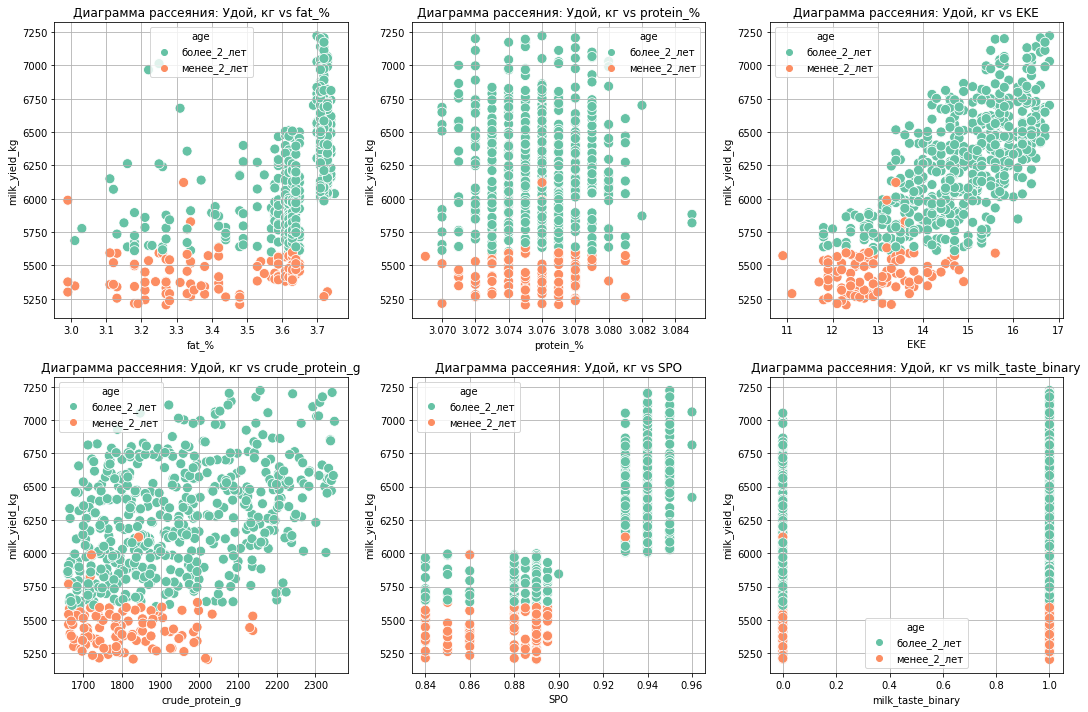

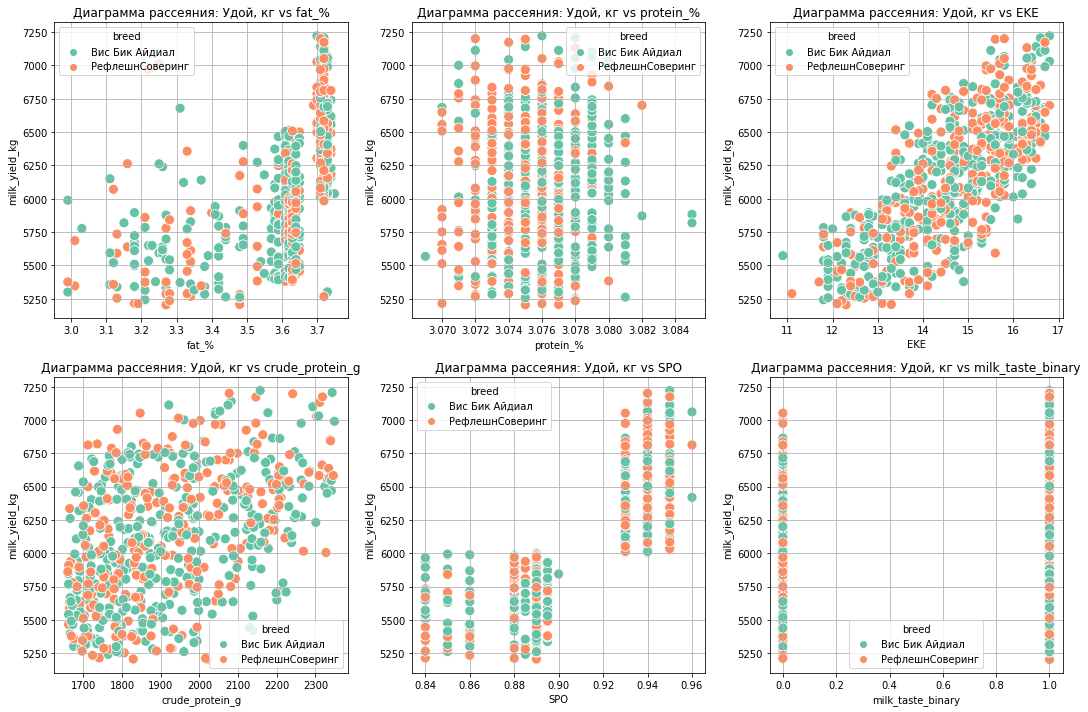

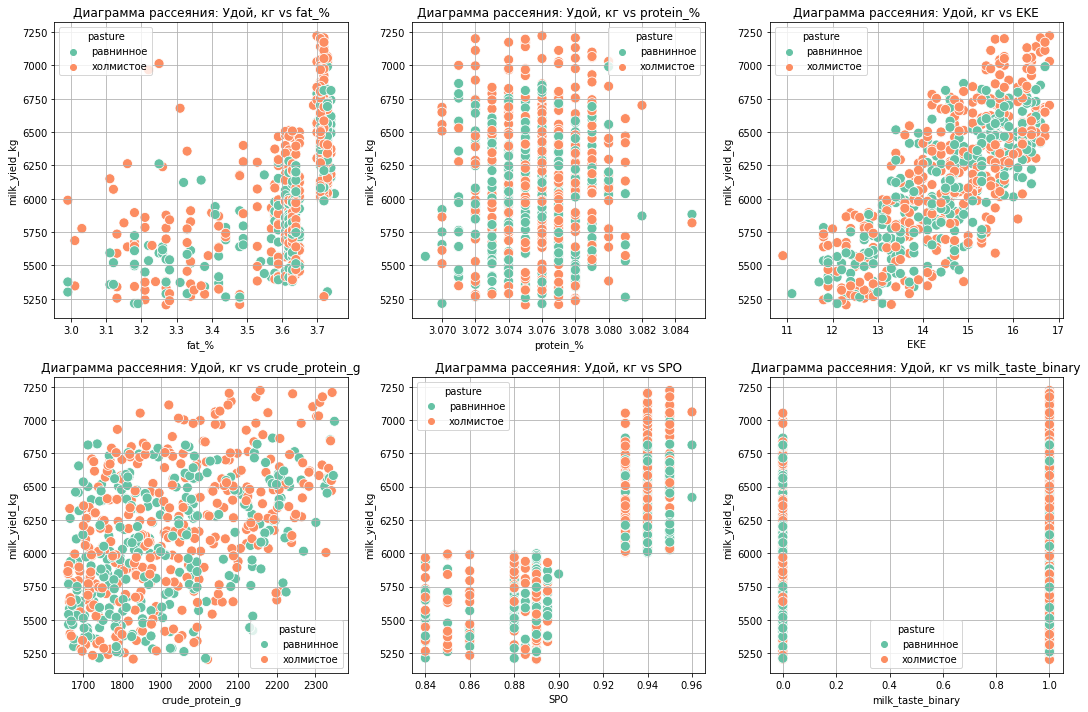

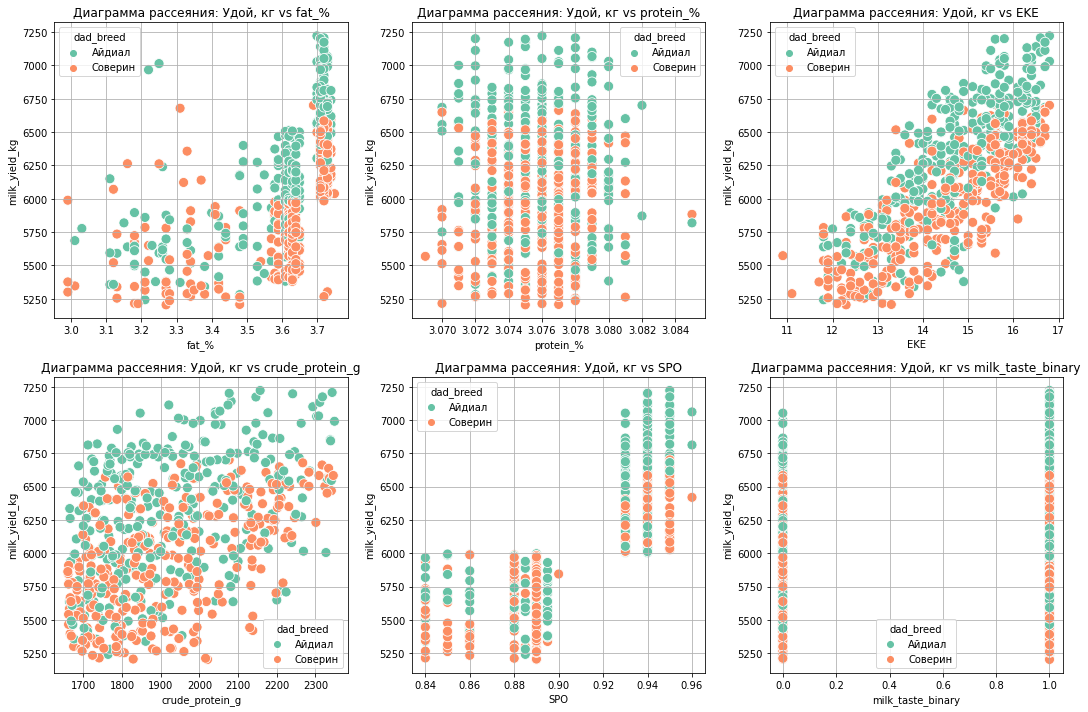

In [18]:
# Количественные признаки, кроме целевого
gr = ['age', 'breed', 'pasture', 'dad_breed',] 
quant_features = num_main.copy() 
quant_features.remove('milk_yield_kg')
# Построим scatterplot для каждого количественного признака против "Удой_кг"


for g in (gr):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(quant_features):
        plt.subplot(2, 3,i+1)
        sns.scatterplot(data=main, x=feature, y='milk_yield_kg', hue= g, palette='Set2', s=100)
        plt.title(f"Диаграмма рассеяния: Удой, кг vs {feature}")
        plt.grid(True)
    plt.tight_layout()
    plt.show()

**Между признаками**


* количество сырого белка в рационе может влиять на удой, но зависимость неустойчивая.
* признак SPO как и fat_%, вероятно, категориальный. высокий spo наблюдаеься только у большего количества удоя

**Между группами**

* У молодых коров меньше удой и другие характеристики у них тоже хуже, чем у более зрелых коров, кроме вкуса молока.
* Различия между породами не критичны — обе демонстрируют схожие тенденции. У РефлешнСоверинг более выский spo
* У коров, которые пасутся на холмистых пастбищах более вкуснео молоко, больше удоя и другие характеристики чуть выше, чем у тех коров, которые пасутся на равнинных пастбищах
* Порода отца - Соверин показывает больше удоя, но хуже вкус молока

##  5) Задача регрессии

1 модель 

* так как использование трех признаков (fat_% , EKE и SPO) может ухудшить модель из-за сидьной корреляции, то я оставвлю только EKE

* признак protein_% не имеет линейной зависимости с другими признаками, он бесполезный 


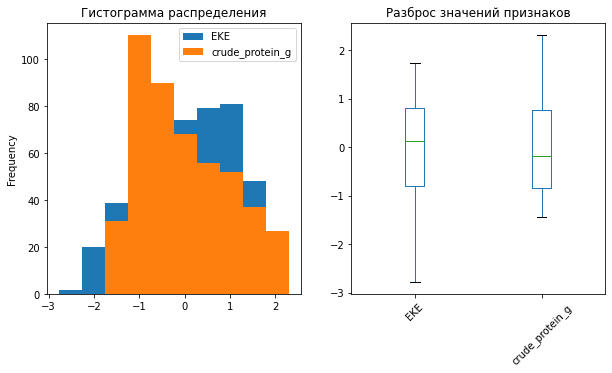

In [19]:
RANDOM_STATE = 42
X = main.drop(['fat_%', 'SPO', 'protein_%','milk_yield_kg'], axis=1)
y = main['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
cat_col_names = ['age', 'breed', 'pasture', 'dad_breed', 'milk_taste_binary']
num_col_names = ['EKE', 'crude_protein_g']
# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()
# обучите и трансформируйте количественные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
 
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)


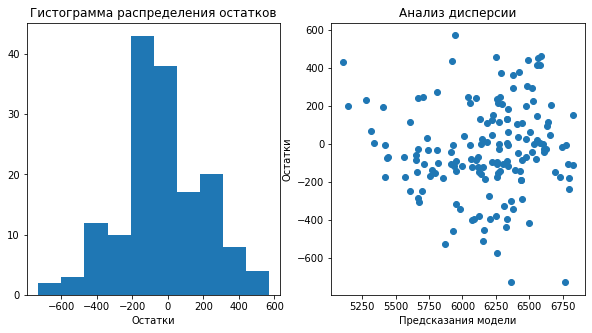

R2 LinearRegression = 0.7147384464942341


In [20]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
# рассчитайте значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
# выведите полученное значение R2
print("R2 LinearRegression =", r2)

**Вывод**

R2 = 0.71 - плохо. Распределение является смещенным влево, означает, что модель преувеличивает удой. 


In [26]:
metr = pd.DataFrame(index=['MAE', 'MSE', 'RMSE'])
mae = mean_absolute_error( y_test, predictions)
mse = mean_squared_error( y_test, predictions)
rmse = mse**0.5
    
metr["Модель 1"] = [mae, mse, rmse]

print(metr)

          Модель 1
MAE     185.879924
MSE   58069.258013
RMSE    240.975638


**ВЫВОД**

В среднем, прогноз модели отклоняется от реального значения на 186 кг. Не очень большое отклоение 

**2 модель**

СПО и Удой связаны нелинейно. Преобразовала СПО в категориальный бинарный признак, использовая  границу.
ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.


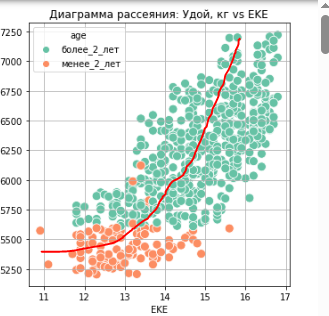

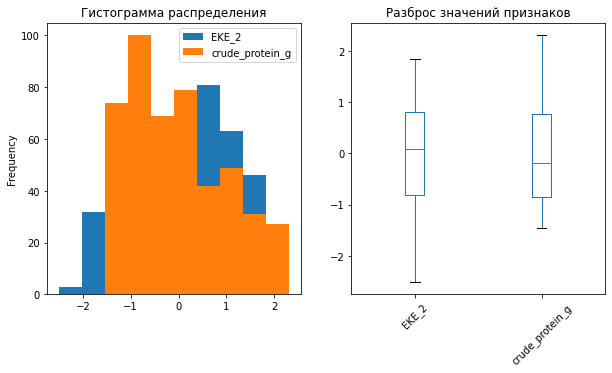

In [33]:
main['SPO_binary'] = (main['SPO']>0.92).astype(int)
main['EKE_2'] = main['EKE']**2
#main['crude_protein_2'] = main['crude_protein_g']**2
RANDOM_STATE = 42
X2 = main.drop(['SPO', 'milk_yield_kg','EKE','fat_%','protein_%', 'milk_taste_binary'], axis=1)
y2 = main['milk_yield_kg']
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y2, 
    random_state=RANDOM_STATE
)
cat_col_names2 = ['age', 'breed', 'pasture', 'dad_breed','SPO_binary']
num_col_names2 = ['EKE_2', 'crude_protein_g']
# создайте переменную с экземпляром класса StandardScaler()
scaler2 = StandardScaler()
# обучите и трансформируйте количественные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_scaled2 = scaler2.fit_transform(X_train2[num_col_names2])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled2 = scaler2.transform(X_test2[num_col_names2])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder2 = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohe2 = encoder2.fit_transform(X_train2[cat_col_names2])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe2 = encoder2.transform(X_test2[cat_col_names2])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names2 = encoder2.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names2)

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=num_col_names2)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=num_col_names2)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1)
 
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train2[num_col_names2].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train2[num_col_names2].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

model_lr2  = LinearRegression()
model_lr2.fit(X_train2, y_train2)
predictions2 = model_lr2.predict(X_test2)


Масштабирование как и у 1 модели

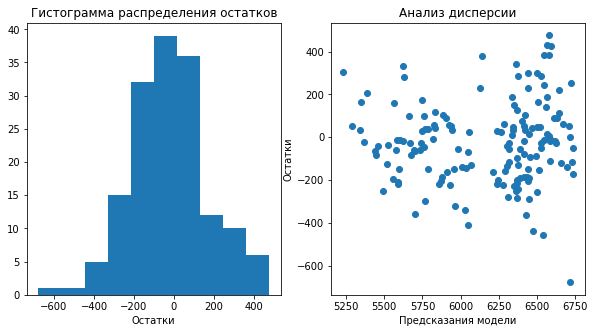

R2 LinearRegression = 0.8180879926867503


In [28]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals2 = y_test2 - predictions2

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions2,residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
# рассчитайте значения R2 для линейной регрессии
r2_2 = r2_score(y_test2, predictions2)
# выведите полученное значение R2
print("R2 LinearRegression =", r2_2)

**Вывод**
R2 = 818 - неплохо. Распределение является смещенным влево, но уже не так сильно, как с первой моделью. Разброс предсказаний одинаковыйй на всех значениях

In [34]:
metr = pd.DataFrame(index=['MAE', 'MSE', 'RMSE'])
mae = mean_absolute_error( y_test2, predictions2)
mse = mean_squared_error( y_test2, predictions2)
rmse = mse**0.5
    
metr["Модель 2"] = [mae, mse, rmse]

print(metr)

          Модель 2
MAE     149.039652
MSE   37030.911311
RMSE    192.434174


**ВЫВОД**

В среднем, прогноз модели отклоняется от реального значения на 149 кг. 

3 модель

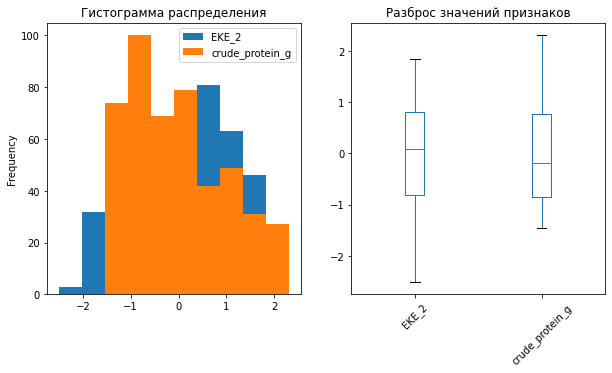

In [29]:
main['EKE_2'] = main['EKE']**2
main['SPO_binary'] = (main['SPO']>0.92).astype(int)
data = pd.merge(main, dad, on='id', how='left')


#main['crude_protein_2'] = main['crude_protein_g']**2
RANDOM_STATE = 42
X3 = data.drop(['SPO', 'milk_yield_kg','EKE','fat_%','protein_%', 'milk_taste_binary' ], axis=1)
y3 = data['milk_yield_kg']
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, 
    y3, 
    random_state=RANDOM_STATE
)
cat_col_names3 = ['age', 'breed', 'pasture', 'dad_breed', 'SPO_binary','dad' ]
num_col_names3 = ['EKE_2', 'crude_protein_g']
# создайте переменную с экземпляром класса StandardScaler()
scaler3 = StandardScaler()
# обучите и трансформируйте количественные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_scaled3 = scaler3.fit_transform(X_train3[num_col_names3])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled3 = scaler3.transform(X_test3[num_col_names3])

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder3 = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohe3 = encoder3.fit_transform(X_train3[cat_col_names3])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe3 = encoder3.transform(X_test3[cat_col_names3])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names3 = encoder3.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns=encoder_col_names3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns=encoder_col_names3)

X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns=num_col_names3)
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns=num_col_names3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train3 = pd.concat([X_train_ohe3, X_train_scaled3], axis=1)
X_test3 = pd.concat([X_test_ohe3, X_test_scaled3], axis=1)
 
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train3[num_col_names3].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train3[num_col_names3].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

model_lr3  = LinearRegression()
model_lr3.fit(X_train3, y_train3)
predictions3 = model_lr3.predict(X_test3)


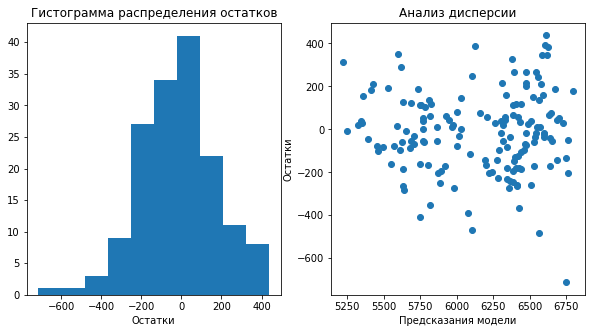

R2 LinearRegression = 0.8247542745210403


In [30]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals3 = y_test3 - predictions3

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions3,residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
# рассчитайте значения R2 для линейной регрессии
r2_3 = r2_score(y_test3, predictions3)
# выведите полученное значение R2
print("R2 LinearRegression =", r2_3)

я не понимаю как нужно устранять нелинейность между признаками. Они же уже устранены

R² больше всего в третий модели, но не значительно отличается от второй. Третья модель показывает себя лучше всех.


In [36]:
metr = pd.DataFrame(index=['MAE', 'MSE', 'RMSE'])

for name, y_true, y_pred in [('Модель 1', y_test,  predictions), ('Модель 2', y_test2,  predictions2), ('Модель 3',y_test3,  predictions3)]:
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    
    metr[name] = [mae, mse, rmse]

print(metr)


          Модель 1      Модель 2      Модель 3
MAE     185.879924    149.039652    146.163024
MSE   58069.258013  37030.911311  35673.889886
RMSE    240.975638    192.434174    188.875329


Все три метрики показывают, что Модель 3 даёт наименьшие ошибки

In [ ]:
low = residuals3.quantile(0.25)
high = residuals3.quantile(0.75)
print(f"доверительный интервал от {low:.2f} до {high:.2f}")

In [ ]:
#cow['EKE']=main['EKE'].mean()*1.05
cow['crude_protein_g']=main['crude_protein_g'].mean()*1.05
#cow['SPO']= main['SPO'].mean()*1.05
cow['EKE_2'] = (main['EKE'].mean()*1.05)**2
cow['SPO_binary'] = ((main['SPO'].mean()*1.05)>0.966).astype(int)


X_3 = cow.drop([ "current_fat_%" , 'current_protein_%'], axis=1)

cat_3 = ['age', 'breed', 'pasture', 'dad_breed', 'SPO_binary','dad' ]
num_3 = ['EKE_2', 'crude_protein_g']


# выполните преобразование количественных признаков в тестовой выборке
X_3s = scaler3.transform(X_3[num_3])

# выполните преобразование категориальных признаков в тестовой выборке
X_3o = encoder3.transform(X_3[cat_3])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder3 = encoder3.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_3o = pd.DataFrame(X_3o, columns=encoder3)

X_3s = pd.DataFrame(X_3s, columns=num_3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_3 = pd.concat([X_3o, X_3s], axis=1)

predictions_3 = model_lr3.predict(X_3)
print(predictions_3)

## 6 Обучение модели логистической регрессии

In [ ]:
Xk = main.drop([ 'milk_taste_binary', 'milk_taste', 'SPO',  'EKE', 'milk_yield_kg'], axis=1)
yk = main['milk_taste_binary']

X_traink, X_testk, y_traink, y_testk = train_test_split(
    Xk, 
    yk, 
    random_state=RANDOM_STATE
)

cat_col_namesk = ['age', 'breed', 'pasture', 'dad_breed', 'SPO_binary']
num_col_namesk = [ 'EKE_2', 'crude_protein_g', 'fat_%', 'protein_%', ]
# приводим значения всех признаков к единой шкале

scalerk = StandardScaler()
X_train_scaledk = scalerk.fit_transform(X_traink[num_col_namesk]) # ваш код
X_test_scaledk = scalerk.transform(X_testk[num_col_namesk])  # ваш код

encoderk = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohek = encoderk.fit_transform(X_traink[cat_col_namesk])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohek = encoderk.transform(X_testk[cat_col_namesk])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_namesk = encoderk.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohek = pd.DataFrame(X_train_ohek, columns=encoder_col_namesk)
X_test_ohek = pd.DataFrame(X_test_ohek, columns=encoder_col_namesk)

X_train_scaledk = pd.DataFrame(X_train_scaledk, columns=num_col_namesk)
X_test_scaledk = pd.DataFrame(X_test_scaledk, columns=num_col_namesk)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_traink = pd.concat([X_train_ohek, X_train_scaledk], axis=1)
X_testk = pd.concat([X_test_ohek, X_test_scaledk], axis=1)

clf = LogisticRegression()

clf = LogisticRegression(random_state=RANDOM_STATE) 
clf.fit(X_traink, y_traink) # ваш код
y_predk = clf.predict(X_testk)

# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X_traink.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

In [ ]:
# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(y_testk, y_predk)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [ ]:
recall = recall_score(y_testk,y_predk) 
precision = precision_score(y_testk,y_predk)
acc = accuracy_score(y_testk, y_predk)

print('accuracy: ',round(acc ,3)) 
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

По accuracy, модель ошибается в 37,6% случаев. 
Модель совершает ошибки FP чаще, чем FN, то есть эффективнее избегает ошибок второго типа. При покупке коров критичнее всего ошибка первого рода. precision более важная метрика для данной задачи.

In [ ]:
y_proba = clf.predict_proba(X_testk)[:,1]
dat = pd.DataFrame(zip(y_testk, y_proba), columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

def cost(y_valid,y_pred_):
    if y_valid > y_pred_:
        return 0
    elif y_valid < y_pred_:
        return 1
    else:
        return 0

thresholds = [round(i,3) for i in np.linspace(0.5,1,num = 100,endpoint=False)]
values = []
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    dat['y_pred_'] = dat['y_proba'].apply(lambda x: 1 if x>= i else 0)
    dat['check'] = dat.apply(lambda x : cost(x.y_valid,x.y_pred_), 1)
    values.append(dat['check'].sum())

costs = pd.DataFrame(zip(columns, values),columns = ['Порог', 'Количесво ошибок 1 рода']) 
print(costs[costs['Количесво ошибок 1 рода']<= 2 ])

начиная с порога 0.8 модель не выбирает коров с невкусным молоком 

In [ ]:
optimal_threshold = 0.8
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

recall2 = recall_score(y_testk,y_pred_optimal) 
precision2 = precision_score(y_testk,y_pred_optimal)
acc2 = accuracy_score(y_testk, y_pred_optimal)

print('accuracy: ',round(acc2 ,3)) 
print('recall: ',round(recall2 ,3))
print('precision: ',round(precision2,3))
# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(y_testk, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

**Вывод**

Теперь модель ошибается в 51,6% случаев, но зато никогда не подумает, что невкусное молоко вкусное)

Не знаю, что нужно делать дальше, ведь ошибки первого рода критичны, и фермеру не нужны коровы с невкусным молоком, но из-за этого модель часто ошибается. С таким придирчивым взглядом на вкус молока, фермер может оказаться и без коров( А как найти этот баланс ?

In [ ]:

cow = cow.rename(columns={'current_protein_%': 'protein_%','current_fat_%': 'fat_%'})

X_k = cow.drop([ 'dad'], axis=1)

cat_col_names_k = ['age', 'breed', 'pasture', 'dad_breed', 'SPO_binary']
num_col_names_k = [ 'EKE_2', 'crude_protein_g',  'fat_%',  'protein_%']
# приводим значения всех признаков к единой шкале


X_ks = scalerk.transform(X_k[num_col_names_k])  
X_ko = encoderk.transform(X_k[cat_col_names_k])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_namesk = encoderk.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_ko = pd.DataFrame(X_ko, columns=encoder_col_namesk)

X_ks = pd.DataFrame(X_ks, columns=num_col_names_k)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_k = pd.concat([X_ko, X_ks], axis=1)

#y_pred_k = clf.predict(X_testk)

y_pred_k = ( (clf.predict_proba(X_k)[:,1])>= optimal_threshold).astype(int)




## Итоговые выводы

In [ ]:
cow["milk_taste"] = y_pred_k
cow["milk_yield_kg"] = predictions_3
display(cow[(cow["milk_taste"] == 1) & (cow["milk_yield_kg"] > 6000)])

Логично убрать SPO_binary(везде 0 ...), но если уберу, фермер без коров будет


Фермер может купить 2 коровы  из стада с минимальным риском для себя, это единственные коровы, у которых и молоко вкусное, и удой юольше 6000

In [ ]:
display(cow.sort_values(by='milk_taste', ascending=False))


Фермеру можно посоветовать взять корову №16, так как у нее тоже вкусное молоко и почти желаемый удой.


Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?

- добавляла доп. признаки, ликвидировала нелинейность и мультиколлинеарность 
Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?

- хочется верить, что можно как-то улучшить, но я не знаю как. Есть наитие, что нелинейность ликвидирована неполность
Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?